# Предобработка:

Регрессия на порядковом датасете

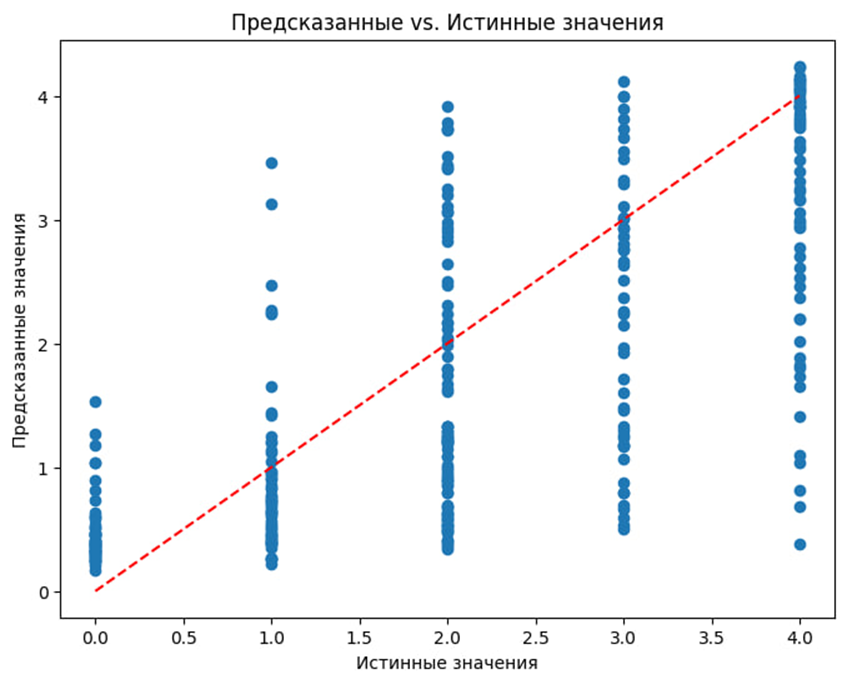

In [ ]:
from google.colab import drive
import pandas as pd

# Монтируем Google Drive
drive.mount('/content/drive')

# Укажите путь к файлу на Google Drive
file_path = '/content/drive/MyDrive/Курсовая_2025/RuFoLa фрагмент для практики.csv'  # Замените на реальный путь

# Читаем CSV файл
try:
    df1 = pd.read_csv(file_path, encoding='utf-8')  # Укажите кодировку
    print(df1.head())  # Выводим первые несколько строк для проверки
except FileNotFoundError:
    print(f"Файл не найден по пути: {file_path}")
except Exception as e:
    print(f"Произошла ошибка при чтении файла: {e}")

Mounted at /content/drive
  id level  level_number     text_genre  \
0  1    A1             1  Учебный текст   
1  2    A1             1  Учебный текст   
2  3    A1             1  Учебный текст   
3  4    A1             1  Учебный текст   
4  5    A1             1  Учебный текст   

                                                text  level_textometr  \
0  Это мой друг. Это моя подруга. Это мой дом. Эт...              1.0   
1  Это я. Меня зовут Анна. Я студентка.Это мой от...              0.5   
2  Это Иван Петрович Сидоров. А это его ученики. ...              0.5   
3  Мы изучаем русский ЯЗЫК.Это наша аудитория. Се...              0.5   
4  Наш город.Петербург.Он не очень старый. Здесь ...              0.5   

   textometr_cefr_number textometr_cefr  words  unique_words  ...  \
0                      1             A1     34            14  ...   
1                      1             A1     40            21  ...   
2                      1             A1     80            55  ...   


In [ ]:
from google.colab import drive
import pandas as pd

# Монтируем Google Drive
drive.mount('/content/drive')

# Укажите путь к файлу на Google Drive
file_path = '/content/drive/MyDrive/Курсовая_2025/Копия рейтинги Эло.csv'  # Замените на реальный путь

# Читаем CSV файл
try:
    df2 = pd.read_csv(file_path, encoding='utf-8')  # Укажите кодировку
    print(df2.head())  # Выводим первые несколько строк для проверки
except FileNotFoundError:
    print(f"Файл не найден по пути: {file_path}")
except Exception as e:
    print(f"Произошла ошибка при чтении файла: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   id                                               text  level_by_textbook  \
0   1  В субботу Мария, Клара, Том были на экскурсии ...                  1   
1   2  Разные люди в разном возрасте делают разные ве...                  1   
2   3  один царь заболел. Каждый день ему было все ху...                  1   
3   4  Я менеджер. Я работаю очень много. Моя жена ду...                  1   
4   5  В столице много больших и маленьких библиотек....                  1   

   level_by_experts  level_by_textometr  
0              0.92                 2.0  
1              0.97                 1.9  
2              0.95                 1.3  
3              0.93                 1.0  
4              0.96                 1.0  


Теперь в первом датасете нужно взять только те значения, которые отличаются от уровней учебников не более, чем на 0.5


In [ ]:
import pandas as pd
import numpy as np

filtered_df = df1[abs(df1['level_textometr'] - df1['level_number']) <= 0.5]

# удаляем значения С2 -- их очень мало, они всё портят
# df = df.drop(df[df['level'] == 6].index)

# Формируем два списка: тексты и уровни
texts = filtered_df['text'].tolist() + df2['text'].tolist()
labels = filtered_df['level_textometr'].tolist() + df2['level_by_experts'].tolist()

# Проверка
print(f"Найдено {len(texts)} подходящих текстов")



Найдено 1101 подходящих текстов


Чуть-чуть выкидываем текстов с метками 0,5 -- их слишком много

In [ ]:
for i in range(400):
  if labels[i] == 0.5:
    labels.pop(i)
    texts.pop(i)

<ipython-input-5-2f4b17bce012>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette='crest')


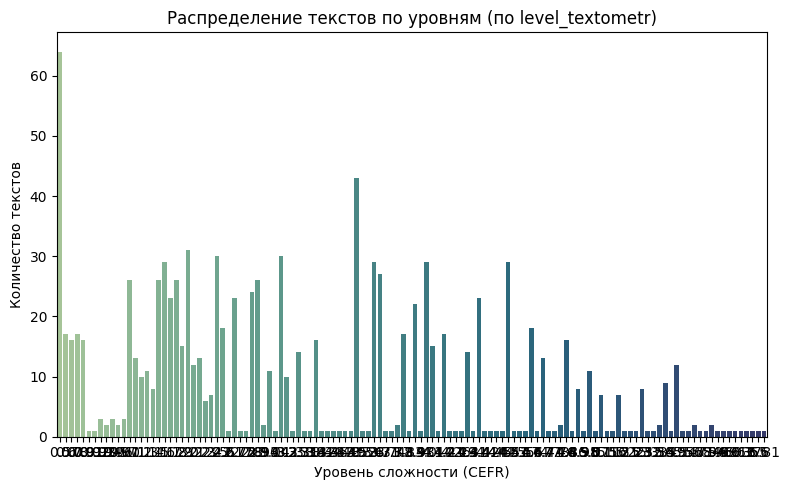

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x=labels, palette='crest')
plt.title("Распределение текстов по уровням (по level_textometr)")
plt.xlabel("Уровень сложности (CEFR)")
plt.ylabel("Количество текстов")
plt.tight_layout()
plt.show()


In [ ]:
print(len(texts))

1047


# Учим на регрессию




In [ ]:
from sklearn.model_selection import train_test_split

# разделеляем данные на обучающую и тестовую выборки
train_texts, vali_texts, train_labels, vali_labels = train_test_split(texts, labels, test_size=0.3, random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(vali_texts, vali_labels, test_size=0.5, random_state=42)
train_texts[:3]

['Американцы живут богато, потому что работают много, а отдыхают мало. Говорят, что они очень активные. Все думают, что американцы живут слишком хорошо, но это неправда. Жить там не очень легко. Люди встают рано утром и активно работают весь день. В Америке важно делать бизнес. Американцы думают, Америка — идеальная страна, но там тоже есть проблемы. Медицина и университеты очень дорогие, и есть места, где опасно гулять вечером.',
 'БЕДНОСТЬ ОТСТУПАЕТ, НО СРЕДНИЙ КЛАСС —ПОПРЕЖНЕМУ В ДЕФИЦИТЕ. Всероссийский центр изучения общественного мнения (ВЦИОМ) представил данные о том, как менялись оценки россиянами собственного материального положения за последние 11 лет. Для этого всех опрашиваемых разделили на пять групп:нищих — тех, кому денег не хватает даже на продукты;бедных — тех, кому на еду хватает, а на одежду — с трудом;«предсредний» слой — тех, кому хватает на еду и одежду, но не хватает дажена недорогую бытовую технику;«средний класс» — тех, кому денег хватает на всё, кроме действите

In [ ]:
from transformers import AutoTokenizer


tokenizer = AutoTokenizer.from_pretrained("sberbank-ai/ruRoberta-large")

# Функция для подготовки данных
def tokenize_function(examples):
    return tokenizer(examples, truncation=True, padding="max_length", max_length=512)

val_encodings = tokenize_function(val_texts)
train_encodings = tokenize_function(train_texts)
test_encodings = tokenize_function(test_texts)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/674 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.81M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

In [ ]:
import torch
from torch.utils.data import Dataset

class TextClassificationDataset(Dataset):
    def __init__(self, encodings, labels):
       self.encodings = encodings
       self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
        return item

    def __len__(self):
        return len(self.labels)
    # Создаём датасеты для PyTorch
train_dataset = TextClassificationDataset(train_encodings, train_labels)
val_dataset = TextClassificationDataset(val_encodings, val_labels)
test_dataset = TextClassificationDataset(test_encodings, test_labels)

In [ ]:
from torch.optim import AdamW
from transformers import AutoModelForSequenceClassification
from transformers import DataCollatorWithPadding, TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.squeeze(predictions)
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(labels, predictions)
    r2 = r2_score(labels, predictions)
    evs = explained_variance_score(labels, predictions)

    return {
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "r2": r2,
        "explained_variance": evs,
    }


model = AutoModelForSequenceClassification.from_pretrained("sberbank-ai/ruRoberta-large", num_labels=1)
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=0.01)
training_args = TrainingArguments(output_dir="trainer_logs",
                                  eval_strategy="epoch", save_strategy='epoch', num_train_epochs=5,
                                  load_best_model_at_end=True, disable_tqdm=False,
                                  per_device_train_batch_size=4, warmup_ratio=0.1,
                                  gradient_accumulation_steps=4,
                                  metric_for_best_model="mse")
trainer = Trainer(
    model=model,
    optimizers=(optimizer, None), # optimizers=(optimizer, scheduler)
    args=training_args,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer), # добавляет паддинг в более короткие элементы батча
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics)
trainer.train()

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at sberbank-ai/ruRoberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: limonovaaa24 (limonovaaa24-michigan-state-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Mse,Rmse,Mae,R2,Explained Variance
1,No log,1.034462,1.034462,1.017085,0.739365,0.532573,0.705310
2,No log,0.356633,0.356633,0.597188,0.417217,0.838853,0.841962
3,No log,0.295238,0.295238,0.543358,0.369910,0.866595,0.881459
4,No log,0.322556,0.322556,0.567940,0.402984,0.854251,0.894010


TrainOutput(global_step=225, training_loss=0.9077962917751736, metrics={'train_runtime': 1658.6752, 'train_samples_per_second': 2.207, 'train_steps_per_second': 0.136, 'total_flos': 3340030720868352.0, 'train_loss': 0.9077962917751736, 'epoch': 4.896174863387978})

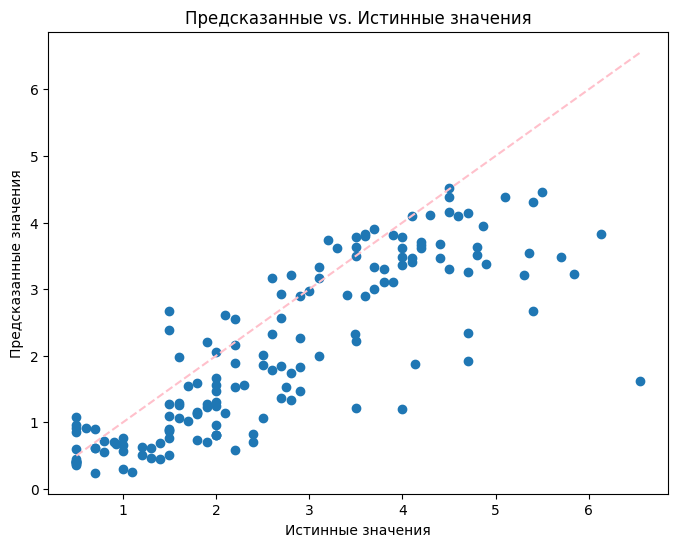

In [ ]:
predictions = trainer.predict(val_dataset)
preds = np.squeeze(predictions.predictions)
labels = predictions.label_ids
# predictions, labels = trainer.predict(val_dataset)

# Вычисление метрик для регрессии
mse = mean_squared_error(labels, preds)
mae = mean_absolute_error(labels, preds)
r2 = r2_score(labels, preds)
evs = explained_variance_score(labels, preds)
import matplotlib.pyplot as plt
import numpy as np

y_true = labels
y_pred = preds

# 1. Scatter Plot (Predicted vs. Actual)
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred)
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.title("Предсказанные vs. Истинные значения")
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle='--', color='pink')  # Add y=x line
plt.show()

In [ ]:
print(mse, mae, r2, evs)

1.034462332725525 0.739364743232727 0.5325726270675659 0.7053104639053345


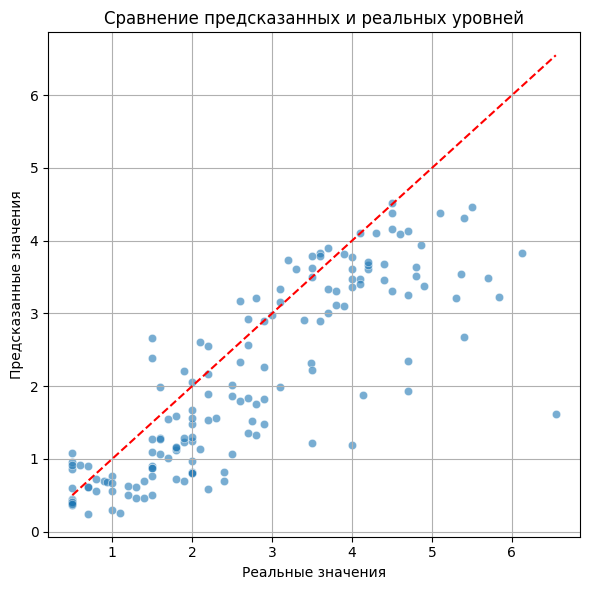

In [ ]:
y_true = labels
y_pred = preds
y_true = np.ravel(y_true)
y_pred = np.ravel(y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # линия идеального предсказания
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("Сравнение предсказанных и реальных уровней")
plt.grid(True)
plt.tight_layout()
plt.show()